<Figure size 1200x600 with 0 Axes>

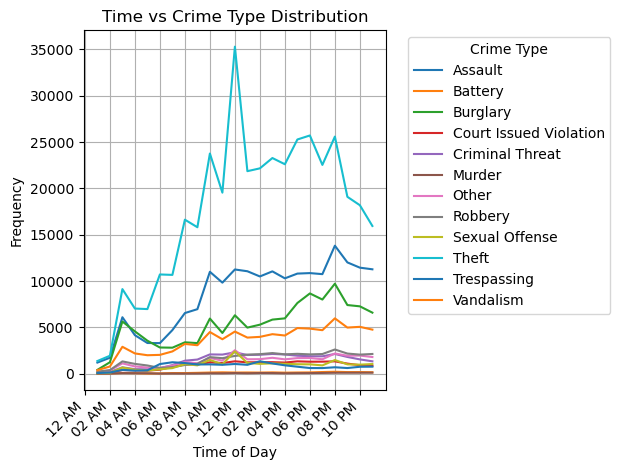

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'Crime_Data_from_2020_to_Present.csv'
df = pd.read_csv(file_path)

def categorize_crime(crime_desc):
    categories = {
        'Theft': ['theft', 'stolen', 'pickpocket'],
        'Sexual Offense': ['rape', 'sex', 'lewd', 'exposure'],
        'Court Issued Violation': ['court', 'restraining'],
        'Burglary': ['burglary'],
        'Murder': ['murder', 'homicide'],
        'Assault': ['assault'],
        'Vandalism': ['vandalism'],
        'Robbery': ['robbery'],
        'Trespassing': ['trespassing'],
        'Battery': ['battery'],
        'Criminal Threat': ['threat', 'brandish']
    }
    
    crime_desc_lower = crime_desc.lower()
    
    for category, keywords in categories.items():
        if any(keyword in crime_desc_lower for keyword in keywords):
            return category
    
    return 'Other'

df['Crime Category'] = df['Crm Cd Desc'].apply(categorize_crime)

df[df['Crime Category'] == 'Other']['Crm Cd Desc'].value_counts().head(20)

crime_time = df.groupby(['TIME OCC', 'Crime Category']).size().unstack()


df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M', errors='coerce').dt.strftime('%I %p')
crime_time = df.groupby(['TIME OCC', 'Crime Category']).size().unstack()


crime_time = crime_time.reindex(pd.date_range(start='00:00', end='23:59', freq='h').strftime('%I %p'))


plt.figure(figsize=(12, 6))
crime_time.plot(kind='line')

plt.title('Time vs Crime Type Distribution')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.xticks(range(0, 24, 2), crime_time.index[::2], rotation=45, ha='right')

plt.tight_layout()
plt.show()